# Credit Card Fraud Detection

## Import Library

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [9]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
print(df.shape)
df.describe()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [25]:
# Untuk mengetahui berapa banyak antara kasus fraud dengan kasus yang valid
fraud = df[df['Class'] == 1]
valid = df[df['Class'] == 0]
OutlierFractions = len(fraud)/float(len(valid))
print(OutlierFractions)
print(f"Fraud Cases: {len(fraud)} ")
print(f"Cases Validations: {len(valid)} ")

0.0017304750013189597
Fraud Cases: 492 
Cases Validations: 284315 


terdapat 0.17% data yang bersifat fraud, sementara kita membutuhkan data 99.8% data transaksi valid. Data transaksi menjadi tidak seimbang, sehingga menimbulkan kecurigaan dalam bertranssaksi.

In [31]:
print("Amount details of the fraudulent transaction") 
fraud.Amount.describe()

Amount details of the fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [33]:
print("Detail Transaction Valid") 
valid.Amount.describe()

Detail Transaction Valid


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Matriks korelasi secara grafis memberi kita gambaran tentang bagaimana fitur berkorelasi satu sama lain dan dapat membantu kita memprediksi fitur apa saja yang paling relevan untuk prediksi.

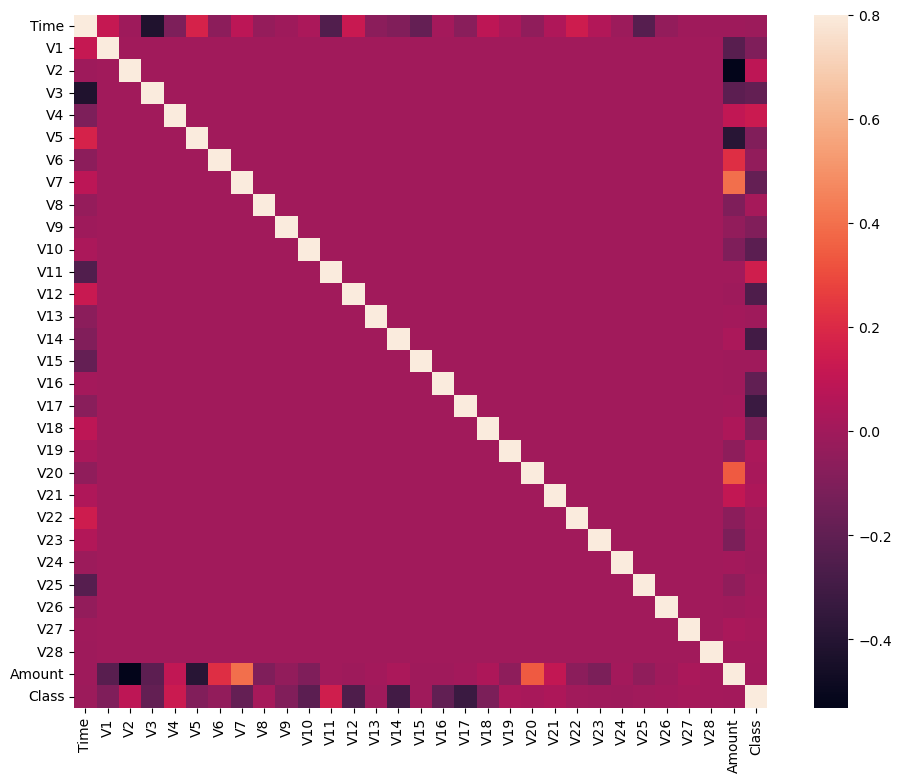

In [38]:
# Correlation Matrix
corrmax = df.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmax, vmax = .8, square =True)
plt.show()

Di HeatMap kita dapat melihat dengan jelas bahwa sebagian besar fitur tidak berkorelasi dengan fitur lainnya tetapi ada beberapa fitur yang memiliki korelasi positif atau negatif satu sama lain. Misalnya, V2 dan V5 berkorelasi sangat negatif dengan fitur yang disebut Jumlah. Kami juga melihat beberapa korelasi dengan V20 dan Jumlah. Hal ini memberi kami pemahaman yang lebih mendalam tentang Data yang tersedia bagi kami.

In [42]:
X = df.drop(['Class'], axis = 1)
Y = df["Class"]
print(X.shape)
print(Y.shape)

xdata = X.values
ydata = Y.values

(284807, 30)
(284807,)


In [44]:
# Train Test and Split Data
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(xdata, ydata, random_state = 42, test_size = 0.2)

### Buiding a Model 

In [52]:
# Random Forest using scikit-learn
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)

In [62]:
# Buiding all kind of evaluating parameters
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud)
n_error = (ypred != ytest).sum()
print("The Model used is Random Forest Classifier")

acc = accuracy_score(ytest,ypred)
print("Accuracy is {}".format(acc))

prec = precision_score(ytest,ypred)
print("Precision is {}".format(prec))

rec = recall_score(ytest,ypred)
print("Recall is {}".format(rec))

f1 = f1_score(ytest,ypred)
print("F1-Score is {}".format(f1))

mcc = matthews_corrcoef(ytest,ypred)
print("Matthews Correlation Coefficient is {}".format(mcc))

The Model used is Random Forest Classifier
Accuracy is 0.9995786664794073
Precision is 0.9743589743589743
Recall is 0.7755102040816326
F1-Score is 0.8636363636363635
Matthews Correlation Coefficient is 0.8690748763736589


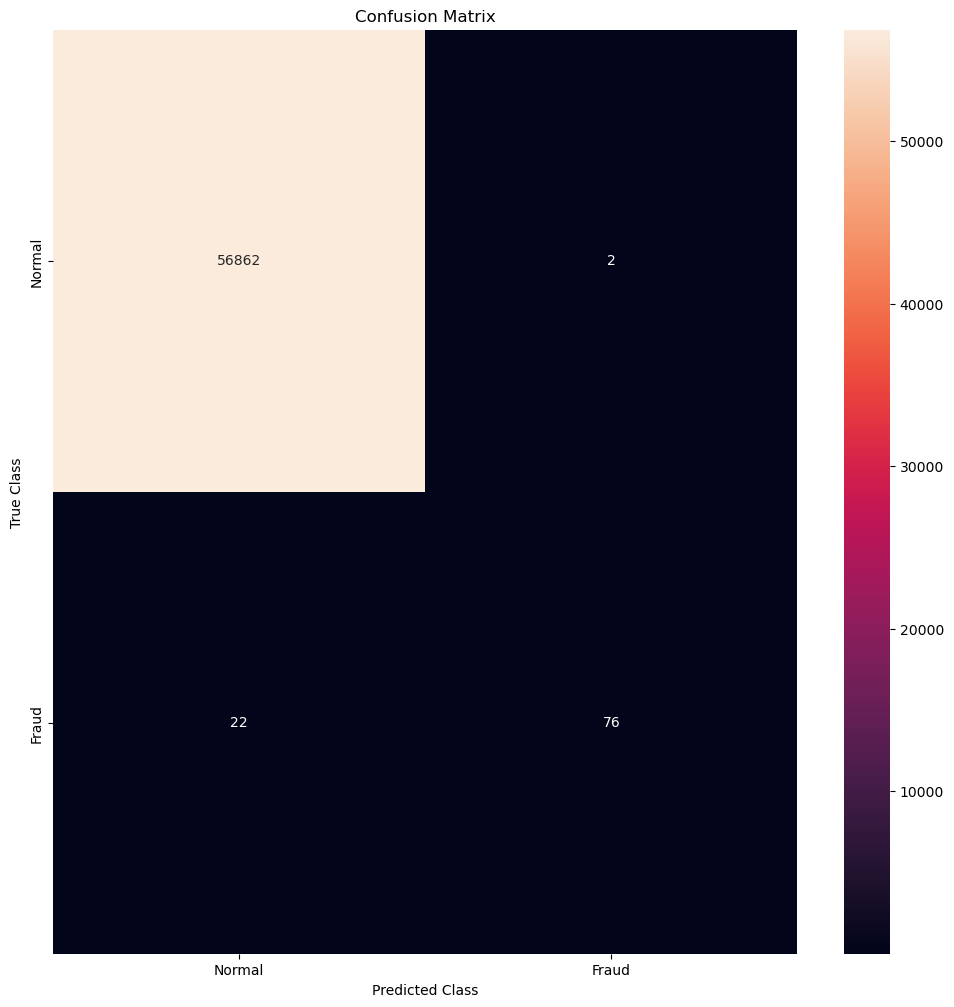

In [66]:
# Visualizing The Confution Matrix
labels = ['Normal','Fraud']
cm = confusion_matrix(ytest,ypred)
plt.figure(figsize=(12,12))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()